<a href="https://colab.research.google.com/github/amberrignell/fcc_machine_learning/blob/main/fcc_MAGIC_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [14]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv('magic04 (1).data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [15]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [16]:
df["class"] = (df["class"] == "g").astype(int)

In [17]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


for sample 0, 10 different "features" that I can pass into a model and spit out the class / label. I know that the label is G -> so this is supervised learning

Machine learning is a subdomain of computer science that focuses on **algorithms which help a computer learn from data without explicit programming**

AI is artificial intelligence -> enable computers and machines to perform human-like tasks

machine-learning is a subset of AI that tries to solve a specific problem and make predictions with data 

data science is a field that tries to find patterns and draw insight from data 

supervised learning -> using labelled inputs - for an input, you have a corresponding output label 

unsupervised learning -> use unlabelled data to learn about patterns in the data 

reinforcement learning -> theres an agent that's learning in an interactive environment based on rewards

inputs = **feature vector **
labels/output =** target vector **

**qualitative feature**: always categorical data - finite number of categories or groups (ex: gender, nationality)
a)  no inherent order  nominal data 

**one-hot encoding** - if matches some category, make it a 1, if it doesn't make it 0

b) ordinal data -> inherent order (ex: age groups, rating good ok bad) 
-> associate each with a number 

**quantitative feature**
a) discrete (n. easter eggs collected)
b) continuous (height) 

supervised learning tasks: 

1. classification - predict discrete classes 
    
    multiclass: this is a pizza, hot dog or ice cream ...
    
    binary: is or isn't a hot dog, positive or negative sentiment, cat or dog ...

2. regression - predict continuous values 

    price of ethereum tomorrow, temperature, price of x house 



how do we evaluate a model? 
- loss
- accuracy 
- 


If you feed ALL of your data into the model, then you're not able to see how the model performs on new data it hasn't seen 

SO you break the data up into 3 datasets: 
- **training dataset** -> feed data into the model, come up with a vector of predictions, then figure out **loss** - the difference between prediction and the true values then make adjustments 

- **validation dataset** -> put through the model (during or after training) to ensure the model can handle unseen data - check the loss there BUT don't feed it back into the model -> not a closed feedback loop

- **testing dataset** -> run test set through the model, to see how generaliseable it is --> how does it perform on completely new data? -> final reported performance of the model 


**Loss**: difference between prediction and the actual label 

**L1 loss** - sum(|Yreal - Ypredicted|) 
sumabsolute value of real output - predicted value
why the sum?? 

https://youtu.be/i_LwzRVP7bg?t=1724

**L2 loss** - sum( (Yreal - Ypredicted)^2 )
quadratic - square the difference between the 2

**Binary cross-entropy loss** 
used for binary data 

Accuracy = a percentage 




In [18]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


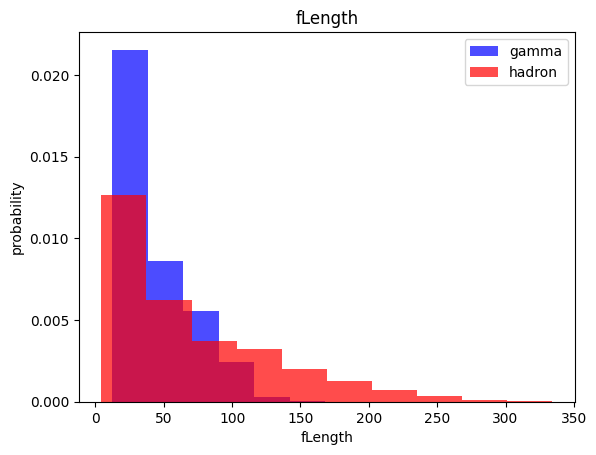

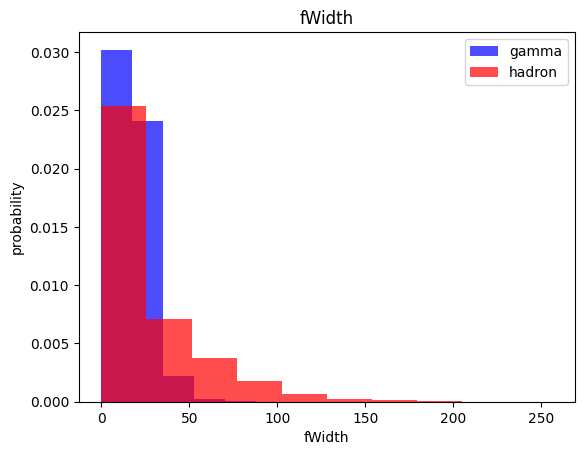

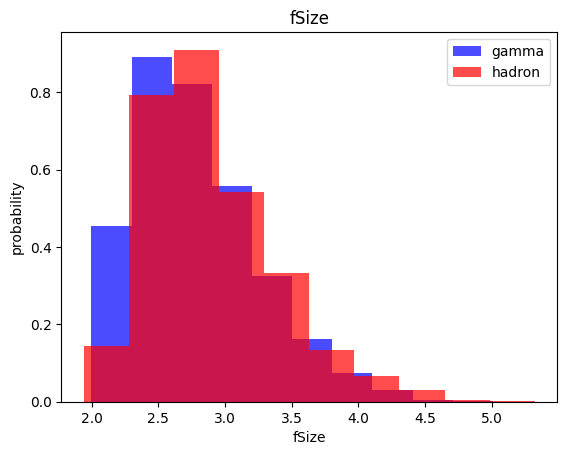

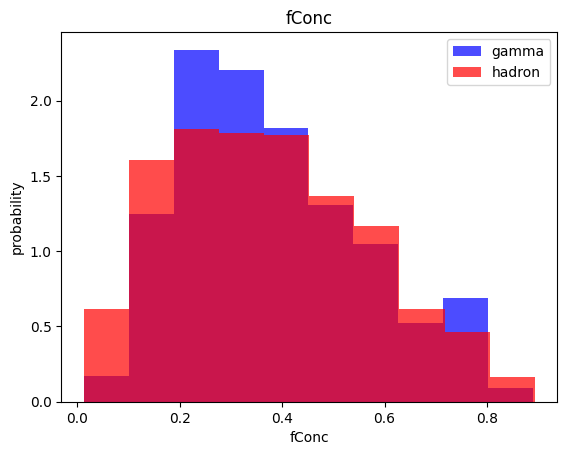

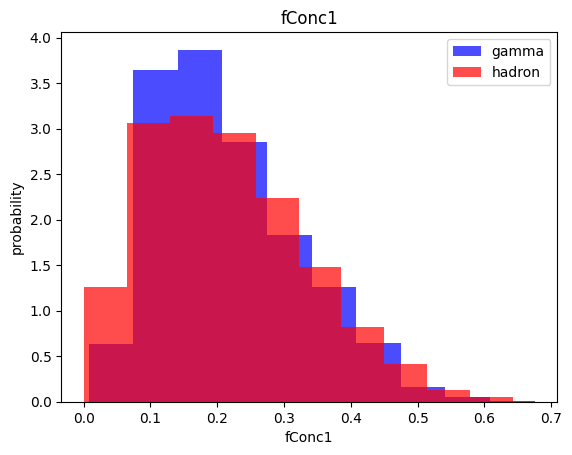

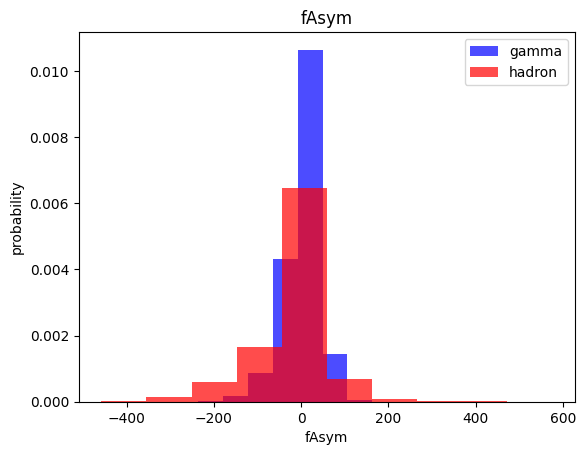

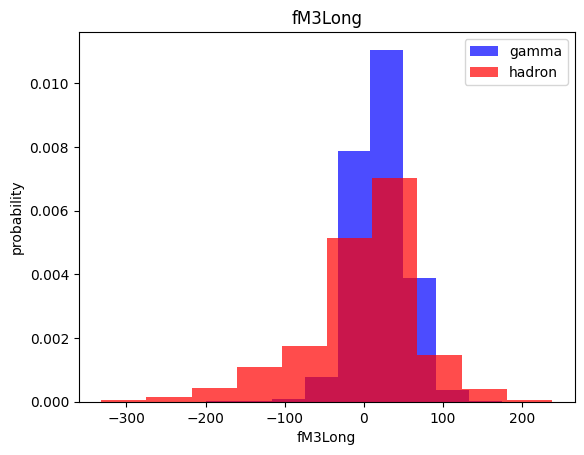

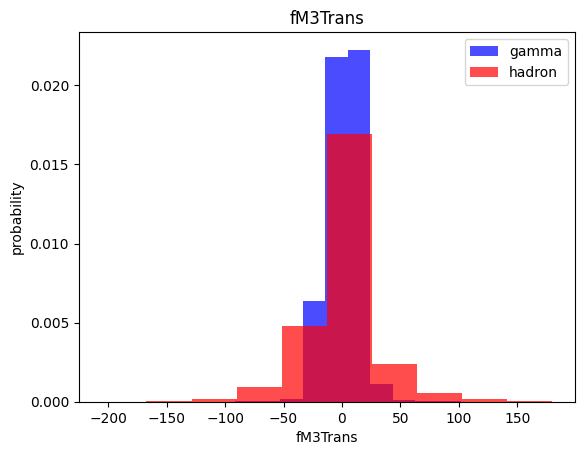

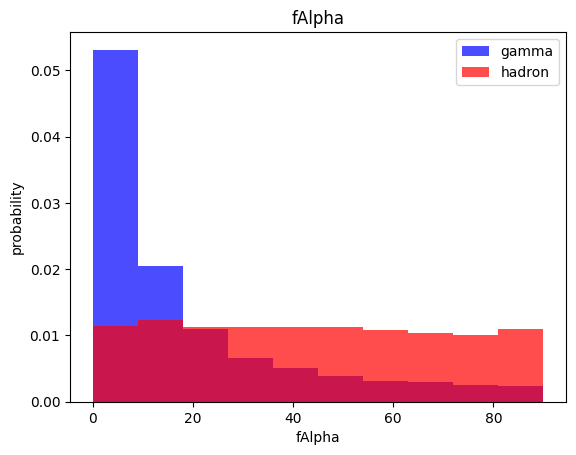

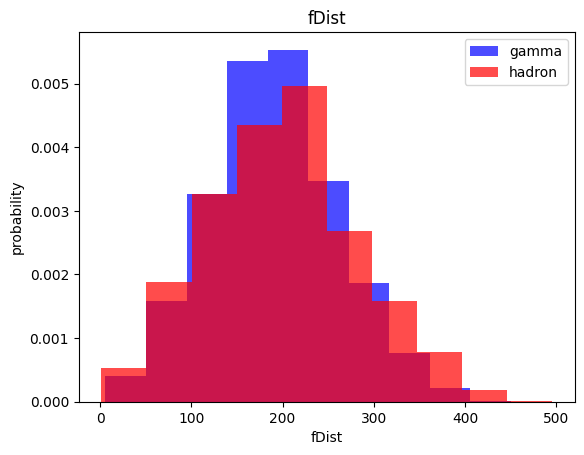

In [19]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color='red', label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [20]:
#train, validation and test dataset
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [21]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x) #remove outliers etc so it fits the normal distribution better
  # not sure what this does - https://youtu.be/i_LwzRVP7bg?t=2318

  if oversample: 
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x, y) #increase the size of the smaller dataset so that they match

  #x is 2D but y is 1D -> need to reshape into a 2D item -- why???
  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [22]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
5138,24.7546,11.4566,2.6010,0.4637,0.2544,32.2748,14.9656,-5.1373,20.6302,166.0080,1
10011,80.7503,30.5812,3.8613,0.1555,0.0832,-53.3292,77.7325,22.1634,5.2390,309.1300,1
14324,173.8034,120.5020,3.2411,0.2114,0.1236,-235.3878,-122.8551,-48.6002,47.9885,247.0455,0
9473,41.6940,18.2801,3.1544,0.2593,0.1489,14.5372,31.7132,-9.5188,3.4088,173.0790,1
13070,39.1762,18.1031,2.8325,0.3779,0.2610,-17.1528,-34.2790,14.5987,62.0530,252.3820,0
...,...,...,...,...,...,...,...,...,...,...,...
939,43.0781,22.9823,3.0830,0.2107,0.1070,9.2348,31.1854,5.6906,23.8840,120.3160,1
2910,63.6680,23.8850,2.8451,0.3700,0.2064,-83.4026,-20.7595,14.8164,11.4153,343.1120,1
9434,13.0035,10.7911,2.1089,0.7549,0.4786,-13.5147,5.1007,-8.1224,11.7248,95.0795,1
9091,52.3941,19.6636,3.3800,0.2709,0.1536,24.2068,43.4488,-11.0781,8.7641,174.0650,1


In [23]:
number_of_gamma = len(train[train["class"] == 1])
number_of_hardons = len(train[train["class"] == 0])
print ("gamma:", number_of_gamma, "hardon:", number_of_hardons, "<-- not enough hadrons")

gamma: 7375 hardon: 4037 <-- not enough hadrons


In [24]:
train, xtrain, ytrain = scale_dataset(train, oversample=True)

In [25]:
sum(ytrain == 1)

7375

In [26]:
sum(ytrain == 0)

7375

In [27]:
valid

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7838,24.4367,0.0000,2.0273,0.6948,0.3615,28.3101,11.4763,0.0000,19.3086,157.1490,1
15459,118.7205,82.8880,3.6062,0.1437,0.0634,-73.6522,-82.4181,69.0357,23.6010,331.8047,0
6041,24.2936,20.4984,2.7675,0.3997,0.2297,-6.0420,12.6444,7.6922,45.4214,108.6540,1
18550,16.8093,16.6981,2.5152,0.4885,0.2763,-2.4459,-9.8945,15.6203,67.2839,86.6666,0
1799,70.0753,19.3644,3.1517,0.2327,0.1216,35.2450,59.7135,-8.1105,4.1472,244.5460,1
...,...,...,...,...,...,...,...,...,...,...,...
16519,39.6908,7.4277,2.8757,0.3713,0.2428,19.2934,42.8343,-5.0365,0.9875,135.5360,0
16702,69.2226,13.3692,3.1438,0.2219,0.1253,48.6375,54.0125,-4.6134,41.2790,207.9230,0
7559,21.4104,6.9318,2.1123,0.7027,0.3900,-23.6931,-11.4999,6.3929,80.5502,207.2620,1
13646,99.5309,33.6540,3.1331,0.1877,0.1086,162.3870,-82.1548,-25.2829,32.3250,227.1570,0


In [28]:
valid, xvalid, yvalid = scale_dataset(valid, oversample=False)
test, xtest, ytest = scale_dataset(test, oversample=False)

# K-nearest neighbour kNN

you look at what's around you, and you take the label of the majority of what's around you 

you need to create a distance function to dedine which neighbours you're looking at 

Euclidean distance -> straight line to the neighbour 
-> [the distance](https://youtu.be/i_LwzRVP7bg?t=2909) = sqrt( (x1-x2)^2 (y1-y2)^2 )


the K tells us how many neighbours to use




In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [31]:
y_predictions = knn_model.predict(xtest)
y_predictions # is it normal not the same result as tutorial? https://youtu.be/i_LwzRVP7bg?t=3269

array([1, 1, 1, ..., 0, 0, 1])

In [32]:
ytest 

array([1, 1, 1, ..., 0, 0, 1])

In [33]:
print(classification_report(ytest, y_predictions))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1301
           1       0.87      0.86      0.86      2503

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



precision = out of all the ones we've labelled as positive, how many were actually positive? 

recall = out of the ones that are actually positive, how many did we label positive? 

f1-score = combination of precision and recall 

## Bayes rule 

P(A|B) = (P(B|A) * P(A)) / P(B) 

posterior = (likelihood * prior) / evidence 

https://youtu.be/i_LwzRVP7bg?t=4299


## Naive Bayes

the probability that we're in some category is proportional the the probabily of that class in general times the probability of all those features 



In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_model = GaussianNB()
nb_model = nb_model.fit(xtrain, ytrain)
y_nb_predictions = nb_model.predict(xtest)

In [36]:
print( classification_report(ytest, y_nb_predictions) )

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1301
           1       0.74      0.88      0.81      2503

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic regression 

If we only have one feature to look at -> simple logistic regression 
other -> multiple logistic regression 

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(xtrain, ytrain)

y_lg_predict = lg_model.predict(xtest)
print(classification_report(ytest, y_lg_predict))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1301
           1       0.85      0.82      0.83      2503

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



# Support vector machines SVM 

look for the hyperplane that best differentiates 2 classes 

not only do we want to separate the two classes really well but we also care about **the margin**

goal is to maximise the margins

the datapoints that lie on the margin lines are **support vectors**


Pb w/ SVMs is that they're not very robust to outliers


kernel trick = go from x to some form of x squared -> "applying the kernel" 

In [39]:
from sklearn.svm import SVC

In [40]:
svm_model = SVC()
svm_model = svm_model.fit(xtrain, ytrain)

In [41]:
y_pred = svm_model.predict(xtest)
print(classification_report(ytest, y_predictions))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1301
           1       0.87      0.86      0.86      2503

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Neural network

without an activation function, it's just a linear model
-> with the functions, the input into the next neuron is no longer linear

3 types of activation functions: 
sigmoid
tanh
relu 


gradient descent -> follow the slope down the quadratic L2 loss function 

backpropagation 
figure out: to what extent is this value contributing to our loss? -> how much do we need to backstep by? 

alpha = the learning rate - controls how long it takes for our neural net to converge 

sequential neural net = goes from one layer to the next
dense layer = all nodes connected to each other 

Tensorflow = open source library that helps you define and train ML models 



In [42]:
import tensorflow as tf

In [43]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [52]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid') #this means projecting our predictions to be 0 or 1 because of the sigmoid function 
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [61]:
def plot_loss_and_acccuracy(history):
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

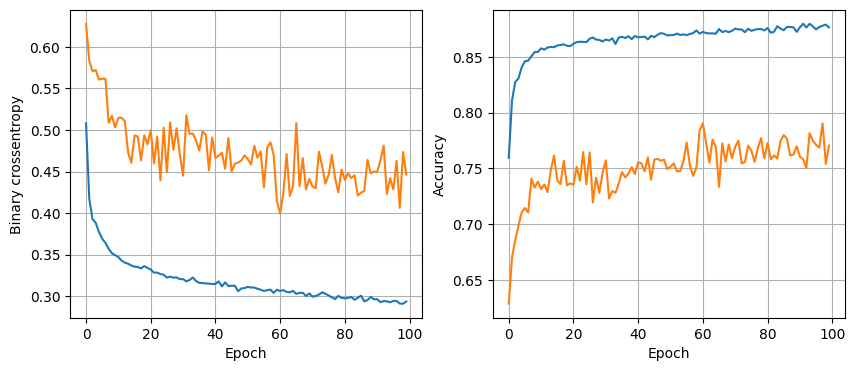

In [62]:
plot_loss_and_acccuracy(history)

16 nodes, dropout 0, lr 0.01, batch size 32


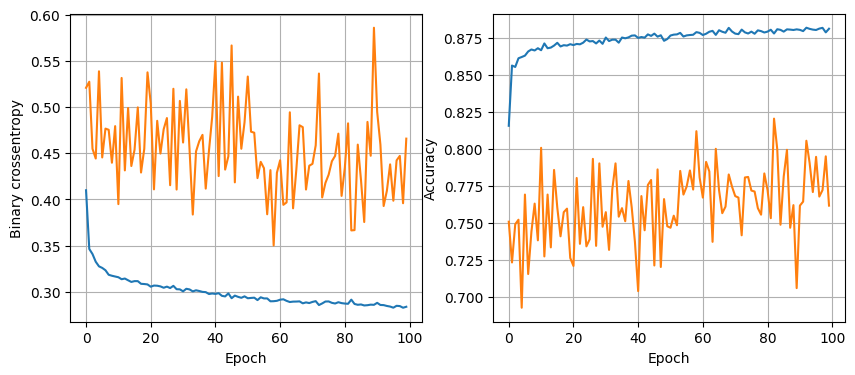

NameError: ignored

In [63]:
least_validation_loss = float('inf') #initialise at inf for later
least_loss_model = None
epochs = 100
for num_nodes in [16, 32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        nn_model, history = train_model(xtrain, ytrain, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_loss_and_acccuracy(history) 
        val_loss = nn_model.evaluate(xvalid, yvalid)
        if val_loss < least_validation_loss:
          least_validation_loss = val_loss
          least_loss_model = nn_model

In [56]:
y_predict = least_loss_model.predict(xtest)
y_predict = (y_predict > 0.5).astype(int).reshape(-1,)


NameError: ignored

In [ ]:
print(classification_report(ytest, y_predict))

# Linear regression 

Residual/error = |yi-yx| 
you want to minimise the sum of all the residuals 

simple linear regression: y = bx + b1*X
multiple linear regression: y = bx+ b1*X1+ b2*X2 ... + bn*Xn

Assumptions: 
- linearity (y increases of decreases at a constant rate) 
- independence (one point has no influence on another) 
- normality (residuals are all normally distributed) 
- homoskedacity (the spread of the residuals is constant) 

Evaluating the models: 

1. Mean Absolute Error (MAE) -> average of all the residuals (sum residuals/n. data points) 
2. Mean Squared Error (MSE) -> sum of the residuals (square them instead of taking absolute value) then divide by n <-- this helps us punish large errors
3. Root Mean Squared Error (RMSE) -> square root of MSE -> allows us to say " we're x$ off in our prediction, instead of having to refer to $^2)
4. Coefficient of determination (R^2) -> when R^2 is closer to one, that's the sign of a good predictor 
